<a href="https://colab.research.google.com/github/tapasmeher10/CNN_Computer_Vision/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Dataset

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


##Randomly show an image using Open CV

In [3]:
import cv2
import numpy as np

In [4]:
# for i in range(0,6):
#   random_num= np.random.randint(0,len(x_train))
#   img=x_train[random_num]
#   window_name=" Random sample"+str(i)
#   cv2.imshow(window_name,img)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()

## Using matplolib

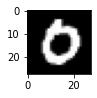

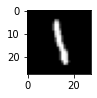

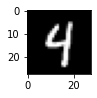

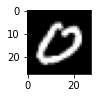

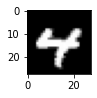

In [5]:
import matplotlib.pyplot as plt
for i in range(0,5):
  plt.subplot(331)
  random_num=np.random.randint(0,len(x_train))
  plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
  plt.show()

## Getting our dataset into shape

In [6]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[0]
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#store the shape of a single image
input_shape = (img_rows,img_cols,1)

#change our image type to float32 data type
x_train = x_train.astype('float32')
x_test =x_test.astype('float32')

#normalize our data by changing the range from 0 - 255 to 0 - 1
x_train /= 255
x_test /= 255

print('x_train shape',x_train.shape)
print('train samples',x_train.shape[0])
print('test samples',x_test.shape[0])

x_train shape (60000, 28, 28, 1)
train samples 60000
test samples 10000


## Hot encode

In [7]:
#one hot encode our labels(y)
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print("Number of class :" + str(y_test.shape[1]))

num_classes= y_test.shape[1]
num_pixels = x_train.shape[1]* x_train.shape[2]

Number of class :10


##Building the Model

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from tensorflow.keras.optimizers import SGD


#create model
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

##Train Our Model


In [9]:
batch_size=32
epochs= 10

history= model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))


Epoch 1/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.5781 - accuracy: 0.8210 - val_loss: 0.2057 - val_accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 151s 80ms/step - loss: 0.2774 - accuracy: 0.9169 - val_loss: 0.1346 - val_accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.2033 - accuracy: 0.9396 - val_loss: 0.0949 - val_accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1586 - accuracy: 0.9527 - val_loss: 0.0759 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1332 - accuracy: 0.9608 - val_loss: 0.0648 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 168s 89ms/step - loss: 0.1182 - accuracy: 0.9646 - val_loss: 0.0596 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.1051 - accuracy: 0.9694 - val_loss: 0

In [10]:
score= model.evaluate(x_train,y_train,verbose=1)
print("Test loss: ",score[0])
print("Test Accuracy: ",score[1])

1875/1875 [==============================] - 36s 19ms/step - loss: 0.0358 - accuracy: 0.9888
Test loss:  0.03579259291291237
Test Accuracy:  0.9888499975204468


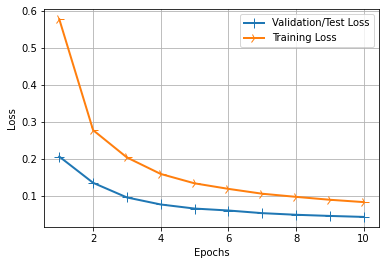

In [14]:
#ploting Loss chart
import matplotlib.pyplot as plt
history_dict=history.history

loss_values =history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
line2=plt.plot(epochs,loss_values,label="Training Loss")
plt.setp(line1,linewidth=2.0,marker="+",markersize=10.0)
plt.setp(line2,linewidth=2.0,marker="4",markersize=10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

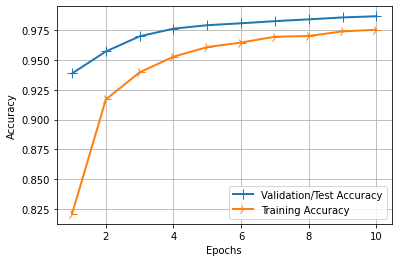

In [17]:
#ploting Accuracy chart
import matplotlib.pyplot as plt
history_dict=history.history

acc_values =history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label="Validation/Test Accuracy")
line2=plt.plot(epochs,acc_values,label="Training Accuracy")
plt.setp(line1,linewidth=2.0,marker="+",markersize=10.0)
plt.setp(line2,linewidth=2.0,marker="4",markersize=10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()